## **Predicting Customer Churn using Telco Data + Estimating Hypothetical Business Impact**


In this kernel we explore customer churn in the telecommunication industry, using Logistic Regression to predict whether a customer will churn or not. We conclude the analysis by estimating the hypothetical business impact (i.e. potential cost savings in this case) that such a churn prediction model could achieve by correctly identifying those customers would potentially churn.


**Overview**

- <a href='#1'>1. Business problem</a>


- <a href='#2'>2. Get the data</a>
    - <a href='#2.1.'>2.1. Data overview</a>


- <a href='#3'>3. Clean the data</a>
    - <a href='#3.1.'>3.1. Drop unnecessary columns</a>
    - <a href='#3.2.'>3.2. Convert data types</a>
    - <a href='#3.3.'>3.3. Check missing values</a>


- <a href='#4'>4. Explore the data</a>
    - <a href='#4.1.'>4.1. The target</a>
    - <a href='#4.2.'>4.2. Categorical  features</a>
    - <a href='#4.3.'>4.3. Numerical features</a>


- <a href='#5'>5. Modeling</a>
    - <a href='#5.1.'>5.1. Preprocessing</a>
    - <a href='#5.2.'>5.2. Logistic Regression</a>
    - <a href='#5.3.'>5.3. Cross validation</a>
    - <a href='#5.4.'>5.4. Parameter tuning</a>

- <a href='#6'>6. Business impact</a>


- <a href='#7'>7. Summary</a>


**Inspiration** 
- [Data Optimal's blog post on: Create Better Data Science Projects With Business Impact](https://www.dataoptimal.com/churn-prediction-with-r/)
- [Pavan Raj's kernel](https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction)
- [Nilan's kernel](https://www.kaggle.com/nilanml/telecom-customer-churn-voting-80-1-accuracy)


**Ideas for future work**
- try more complex models such as tree-based models, ensembles or neural nets to improve predictive power and accuracy
- feature engineering and feature selection
- extract more insights from exploratory analysis
- impute missing values
- make code in business impact section cleaner and more efficient

### **<a id='1'>1. Business problem</a>**

In general, a customer who churns is a customer who quits using a company's service or product. In the case of the telecommunication industry, a customer who churns is a customer who cancels or doesn't extend the existing contract with the telco company. The key assumption here is that acquiring a new customer is more expensive than retaining an existing one. Therefore, it might be a good idea to build a model that uses existing data to identify customers who are likely to churn. Once identified, those customers can be targeted with special offers, for instance, to increase the chances of them staying with their current telco provider. Retaining customer who would churn otherwise saves the cost of acquiring new customers.

### **<a id='2'>2. Get the data</a>**

First, we import some basic libraries and then we load the data from a csv file into a data frame.

In [1]:
# import libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

**<a id='2.1.'>2.1. Data overview</a>**

Let's get a first impression of what is in the data. There are 7043 instances and 21 features in the data and it contains different numeric and categorical features.

In [3]:
# get basic information on the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Furthermore, there are 7043 unique customers in the data.

In [4]:
# get the number of unique customers

len(df.customerID.unique())

7043

Let's get an impression of what the data actually looks like.

In [5]:
# checkout the first 5 rows of the data to get an impression of the data

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **<a id='3'>3. Clean the data</a>**

Let's clean the data before we proceed with the exploratory analysis and the modeling.

**<a id='3.1.'>3.1. Drop unnecessary columns</a>**

Since the 'customerID' column doesn't convey useful information for the exploratory analysis or the modeling we can drop it.

In [6]:
# drop customerID

df = df.drop(['customerID'], axis = 1)

**<a id='3.2.'>3.2. Convert data types</a>**

To be able to properly work with the 'TotalCharges' column we have to convert it to a numerical data type.

In [7]:
# convert TotalCharges to float

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

**<a id='3.3.'>3.3. Check missing values</a>**

It is important to assess the amount and nature of missing values in the data to be able to conduct a concise exploratory analysis and build a good prediction model. Overall, there are only 11 missing values in the 'TotalCharges' column.

In [8]:
# checkout amount of missing values

df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

For the purpose of simplicity, we just drop the rows containing missing values for now. Once could also impute them with the median or mean, for instance, but we don't do this for now since the amount os missing values is very low in relation to the total amount of data we have.

In [9]:
# drop instances with missing values

df = df.dropna()

# check whether there remain missing values

df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **<a id='4'>4. Explore the data</a>**

Now it's time to explore the data in more detail. For this purpose we load some visualization libraries.

In [10]:
# import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

# settings

sns.set()
%matplotlib inline

**<a id='4.1.'>4.1. The target</a>**

First, let's explore the target, 'Churn'. The countplot below gives us a first impression of the amount of customers who didn't churn in relation to the amount of customers who actually churned. We observe that there are much more customer who didn't churn in comparison to the amount of customer who actually churned.

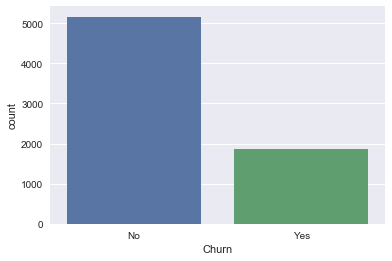

In [11]:
# countplot of Churn

sns.countplot(df['Churn'])
plt.show()

More precisely, in the cleaned version of our data, there are 5163 customers who didn't churn and 1869 customers who churned. This implies that the classes of our target are imbalanced, i.e. there are much more cases of one class than of the other.

In [12]:
# amount of customers who didn't churn and who churned

df.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

To express the class distribution differently, we can calculate the churn rate, i.e. the relation of customers who churned. It is about 27%.

In [13]:
# churn rate

churn_rate = df.groupby('Churn').size()[1]/df.Churn.count()
print('Churn rate: %.2f%%' % (churn_rate * 100.0))

Churn rate: 26.58%


**<a id='4.2.'>4.2. Categorical features</a>**

Let's now explore the categorical features in our data. First, we create a list of categorical features and we then create a countplot for each categorical feature that shows the amount of the different values of the respective categorical features.


We observe that 

- there is about an equal amount of female and male customers
- there are much less senior citizens than there are citizens who are not senior
- 'partner' is equally distributed
- there are much more cases where 'Dependents' takes on the value 'No' compared to the amount of cases where 'Dependents' takes on the value 'Yes'
- most customers have phone service included in their contracts
- there is about an equal amount of customers who have only one line and customers who have multiple lines
- many customers have internet service included in their contracts and more customers have fiber optic than DSL
- of those customers who have internet service included, most don't have internet security
- of those customers who have internet service included, more don't have online backup than have online backup
- of those customers who have internet service included, more don't have device protection than have device protection
- of those customers who have internet service included, more don't have tech support than have tech support
- of those customers who have internet service included, the amount of those who have and have not streaming TV included is almost equal
- of those customers who have internet service included, the amount of those who have and have not streaming movies included is almost equal
- most customers have month-to-month contracts, while the amount of customers who have one-year or two-year contracts is about equal
- there are more customers who have paperless billing
- most customers use electronic check as their payment method, while the amount of customers who use mailed check, bank transfer or credit card is about equal

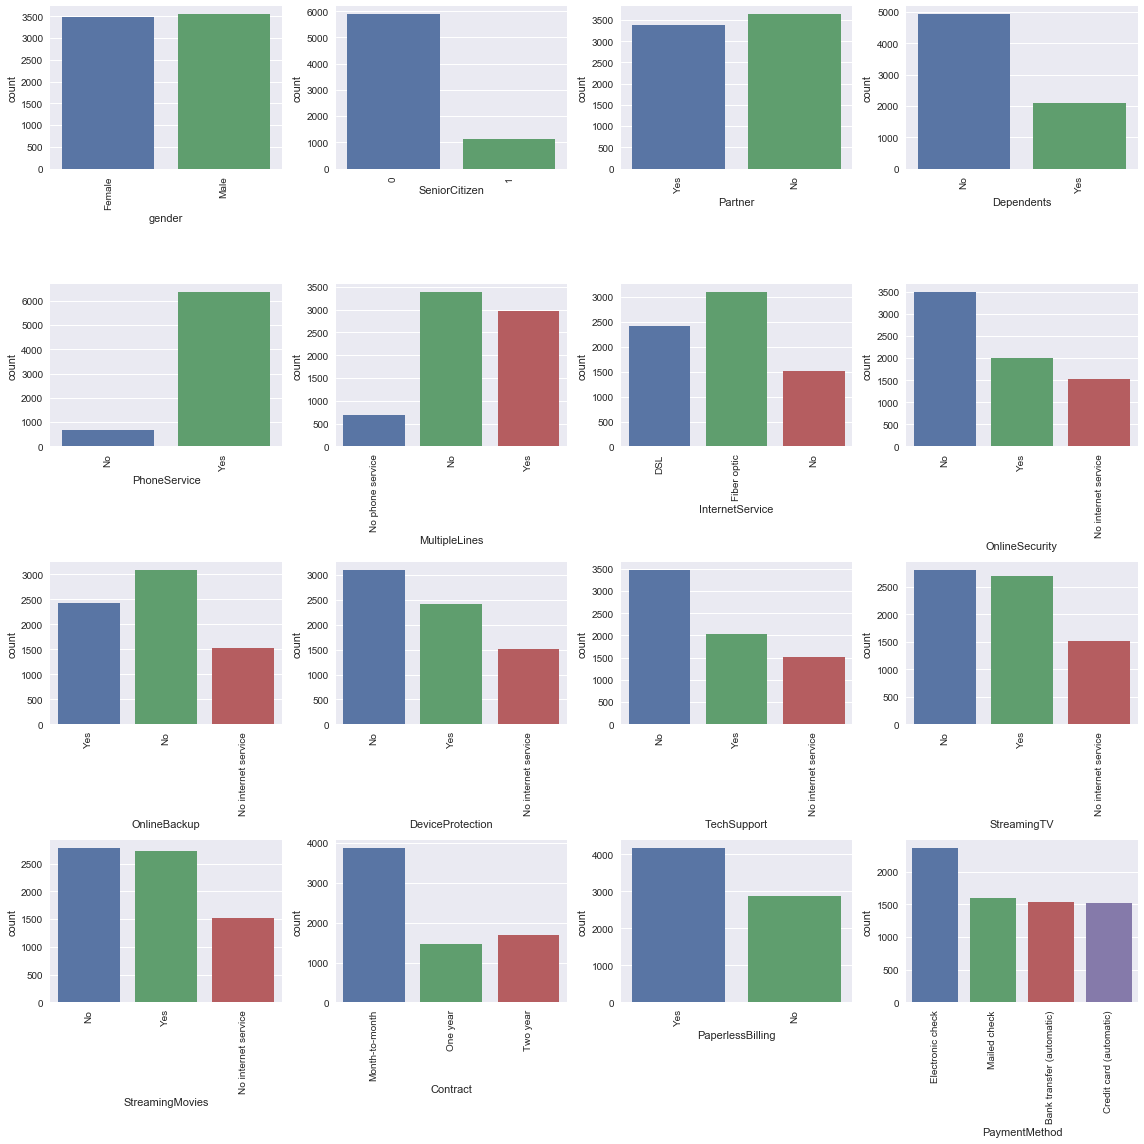

In [14]:
# countplots of all categorical features

df_cat_features = df[['gender', 
                        'SeniorCitizen',
                        'Partner', 
                        'Dependents', 
                        'PhoneService', 
                        'MultipleLines', 
                        'InternetService', 
                        'OnlineSecurity', 
                        'OnlineBackup', 
                        'DeviceProtection',
                        'TechSupport',
                        'StreamingTV', 
                        'StreamingMovies',
                        'Contract',
                        'PaperlessBilling',
                        'PaymentMethod']].copy()

plt.figure(figsize=(16,16))
for i in range(0,16):
        plt.subplot(4,4,i+1)
        sns.countplot(df_cat_features.iloc[:,i])
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Next, we explore whether there are differences in regard to whether a customer churned or not across the different values of all categorical features. We keep it to the most interesting insights, though.


We observe the following:


- 'gender': there is about an equal amount of female and male customers who churned
- 'SeniorCitizen': a high number of senior citizens churned
- 'InternetService': among those customers who have fiber optic many more churned than among those who have DSL
- 'OnlineSecurity': among those customer who have no online security many more churned than among those who have online security
- 'OnlineBackup':  among those customer who don't have online backup many more churned than among those who have online backup
- 'DeviceProtection':  among those customer who don't have device protection many more churned than among those who have device protection
- 'TechSupport':  among those customer who don't have tech support many more churned than among those who have tech support
- 'StreamingTV': the amount of customers who churned is about equally distributed across those customers who have and who don't have streaming TV
- 'StreamingMovies': the amount of customers who churned is about equally distributed across those customers who have and who don't have streaming movies
- 'Contract': most customers who churned have month-to-month contracts
- 'PaperlessBilling': most customers who churned use paper billing
- 'PaymentMethod': most customers who churned use electronic check 


From these observations one hypothesis we might conclude is that customers who are less engaged with their telco provider, i.e. have less services included in their contracts and have month-to-month contracts for instance, are more likely to churn. Not a really surprising observation, but that's what the data seem to tell us.

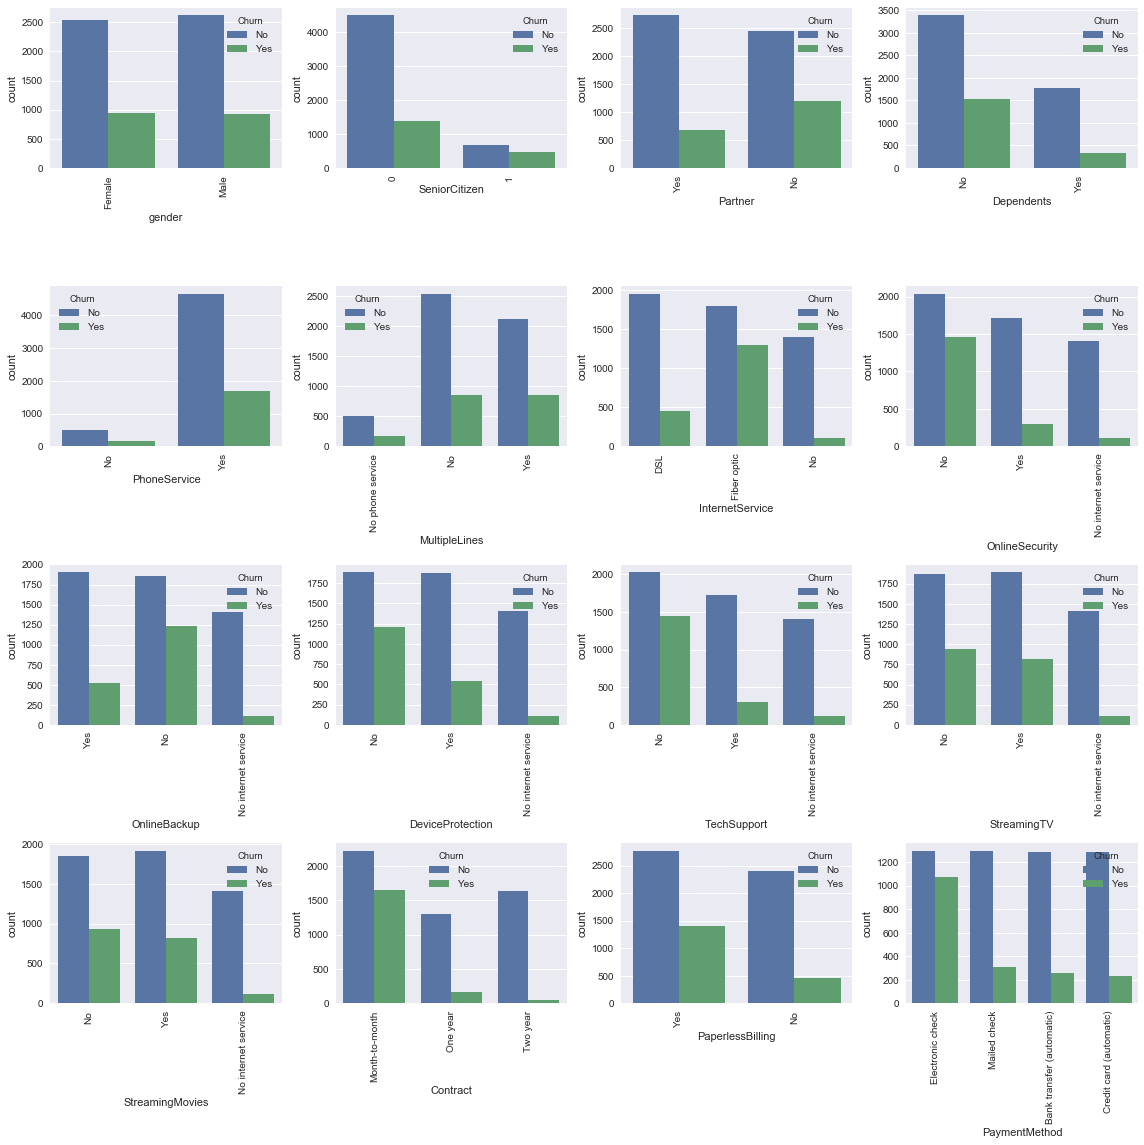

In [15]:
# countplots of all categorical features by Churn

plt.figure(figsize=(16,16))
for i in range(0,16):
        plt.subplot(4,4,i+1)
        sns.countplot(df_cat_features.iloc[:,i], hue=df['Churn'])
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**<a id='4.3.'>4.3. Numerical features</a>**

There are 3 numerical features in our data, namely 'tenure', 'MonthlyCharges', and 'TotalCharges'. Below are some summary statistics for these features. The average 'tenure' is about 34 years, the average 'MonthlyCharges' about 65 dollars, and the average 'TotalCharges' about 2283 dollars.

In [16]:
# summary statistics for numerical features

df.describe().iloc[:,1:4]

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Below is a heatmap of the numerical features. One observation is that 'tenure' is correlated with 'TotalCharges', which makes sense because the longer a contract exists, the higher the total amount paid for that contract.

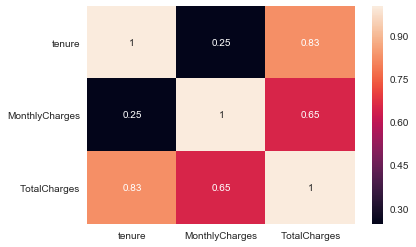

In [17]:
# heatmap of correlations of the numeric features

corr = df.drop('SeniorCitizen', axis=1).corr() # SeniorCitizen is again excluded here
sns.heatmap(corr, annot=True)
plt.show()

Below are boxplots for 'MonthlyCharges' and 'TotalCharges'. They convey information on the distribution of the values of numerical variables, e.g. mean, quartiles and outliers. There are outliers on both ends for 'MonthlyCharges' and predominantely on the upper end for 'TotalCharges'. For more information on boxplots click [here](https://de.wikipedia.org/wiki/Box-Plot).

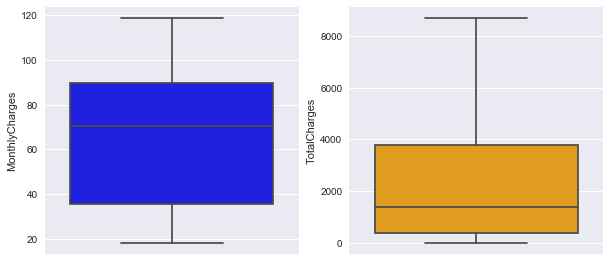

In [18]:
# boxplots of MonthlyCharges and TotalCharges

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['MonthlyCharges'], orient='vertical', color='blue')
plt.subplot(2,2,2)
sns.boxplot(df['TotalCharges'], orient='vertical', color='orange')
plt.show()

Below are histograms for 'MonthlyCharges' and 'TotalCharges'. They convey information on how the values of a variable are distributed in terms of frequency. We oberve that there are many 'MonthlyCharges' around 20 dollars and another large group between around 70 and 100 dollars. 'MonthlyCharges' between 20 and 70 dollars, however, seem to be less frequent.


The frequency of large 'TotalCharges' appears to decrease as 'TotalCharges' increases, which makes sense generally as for 'TotalCharges' to be large a customer has to have their contract for quite a long time which doesn't happen very often as we will see later. 


Overall we can conclude that neither 'MonthlyCharges' nor 'TotalCharges' appear to be normally distributed.

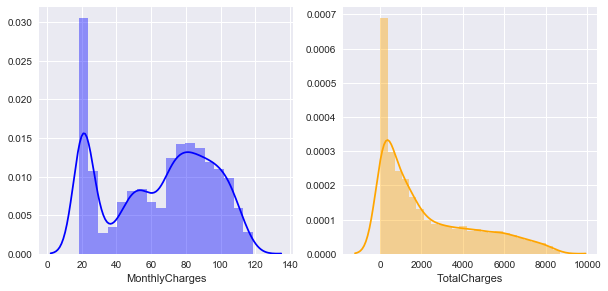

In [19]:
# histograms of MonthlyCharges and TotalCharges

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['MonthlyCharges'], kde=True, color='blue')
plt.subplot(2,2,2)
sns.distplot(df['TotalCharges'], kde=True, color='orange')
plt.show()

Below is a boxplot for 'tenure' that shows that there are some outliers on both ends.

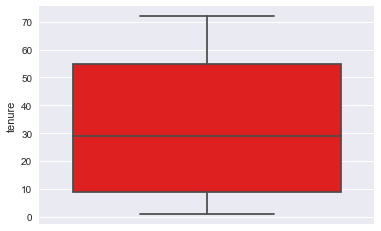

In [20]:
# boxplot of tenure

sns.boxplot(df['tenure'], orient='vertical', color='red')
plt.show()

Below is a histogram of 'tenure'. There appear to be many contracts that didn't last long and the amount of longer contracts appears to decrease with contract length. Interestingly, there appears to be a peak in the frequency of contracts that are around 70 years in length.

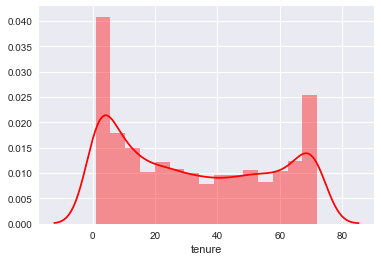

In [21]:
# histogram of tenure

sns.distplot(df['tenure'], kde=True, color='red')
plt.show()

Let's now consider our numeric features in relation to our target, 'Churn'. First, for each numeric feature we have, 'MonthlyCharges', 'TotalCharges', and 'tenure', we create a function that maps the values of each numeric variable to a specific group (low, lower medium, upper medium or high) based on the first, second, third, and fourth quartiles of each numeric variable, respectively. We then, in turn, apply this function to each numeric variable to create a new column for each numeric variable in our data frame that represents to which group each instance in our data belongs, respectively. Finally, we create a countplot of the groups for each numeric variable and the amount of customers who did and who didn't churn.


*Note: The groups in the following plots are based on quartiles. If one were to create different groups, based on different quantiles for instance, the plots could look considerably different.*


First, let's consider 'MonthlyCharges'. We observe that most customers fall into the low group, followed by the lower medium group. The upper medium group contains less customers than the high group and both contain less customers than the low and the lower medium group. Interestingly, the amount of customers who churned appears to increase with monthly charges group and slightly falls off again when the high group is reached. This implies that the higher a customer's monthly charge, the less likely he is to churn. This fits to the observation we made before: the more engaged a customer, i.e. the more services are included in the contract, the less likely he is to churn. And in turn, the more services are included in the contract, the higher the monthly charge.

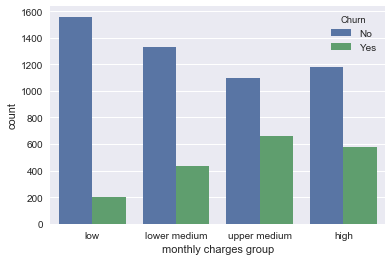

In [22]:
# function to map values of tenure to different groups based on quartiles

def monthly_charges_group(row):
    if row['MonthlyCharges'] <= df.MonthlyCharges.quantile(0.25):
        return 'low'
    elif row['MonthlyCharges'] <= df.MonthlyCharges.quantile(0.5):
        return 'lower medium'
    elif row['MonthlyCharges'] <= df.MonthlyCharges.quantile(0.75):
        return 'upper medium'
    else:
        return 'high'

# create new column containing the group information based on quartiles 

df['monthly charges group'] = df.apply(monthly_charges_group, axis=1)

# countplot of monthly charges groups by Churn

sns.countplot(df['monthly charges group'], hue=df['Churn'], order=['low', 'lower medium', 'upper medium', 'high'])
plt.show()

Second, let's consider 'TotalCharges'. Here, most customer falls into the high group. There is almost an equal amount of customers in the lower medium and upper medium groups, while the least customers are in the low group. The amount of customers who churned appears to decrease with the total charges group. This means that the higher a customer's total charges, the less likely he is to churn, i.e. a customer that has a high total charge has been with the telco provider for quite some time (and maybe also has high monthly charges, see above) and appears to be loyal.

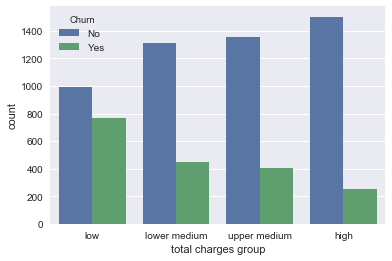

In [23]:
# function to map values of tenure to different groups based on quartiles

def total_charges_group(row):
    if row['TotalCharges'] <= df.TotalCharges.quantile(0.25):
        return 'low'
    elif row['TotalCharges'] <= df.TotalCharges.quantile(0.5):
        return 'lower medium'
    elif row['TotalCharges'] <= df.TotalCharges.quantile(0.75):
        return 'upper medium'
    else:
        return 'high'
    
# create new column containing the group information based on quartiles 
    
df['total charges group'] = df.apply(total_charges_group, axis=1)

# countplot of total charges groups by Churn

sns.countplot(df['total charges group'], hue=df['Churn'], order=['low', 'lower medium', 'upper medium', 'high'])
plt.show()

Lastly, we consider 'tenure'. The amount of customers per group steadily increases with the tenure group, while the amount of customers who churned decreases with the tenure group. There are only few customers who churned in the high group, but almost all customers in the low group churned. This implies that the longer a customer's tenure, the less likely he is to churn. Same argument as above: loyal customers who have been with the telco provider for quite some time tend to be less likely to churn.

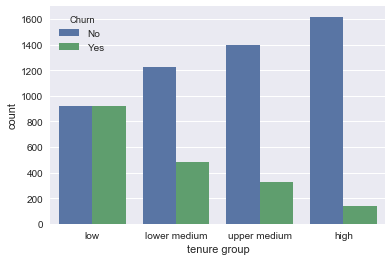

In [24]:
# function to map values of tenure to different groups based on quartiles

def tenure_group(row):
    if row['tenure'] <= df.tenure.quantile(0.25):
        return 'low'
    elif row['tenure'] <= df.tenure.quantile(0.5):
        return 'lower medium'
    elif row['tenure'] <= df.tenure.quantile(0.75):
        return 'upper medium'
    else:
        return 'high'
    
# create new column containing the group information based on quartiles 

df['tenure group'] = df.apply(tenure_group, axis=1)

# countplot of tenure groups by Churn

sns.countplot(df['tenure group'], hue=df['Churn'], order=['low', 'lower medium', 'upper medium', 'high'])
plt.show()

Before we proceed to the modeling part, we drop the newly created group columns and check our data frame to make sure the dropping has been successful.

In [25]:
# drop columns created for exploratory analysis and check df before proceeding to modeling

df = df.drop(['tenure group', 'monthly charges group', 'total charges group'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 ### **<a id='5'>5. Modeling</a>**

**<a id='5.1.'>5.1. Preprocessing</a>**

Before we can start building our prediction model, we need to do some preprocessing. First, we create a copy of our original data frame to encode the categorical features and our target', so that our model can process them later on.

In [26]:
# copy df to create df_enc to encode categorical features and the target

df_enc = df.copy()

Then we encode our target, 'Churn', using a binary label encoder.

In [27]:
# encode target

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_enc['Churn'])
df_enc['Churn'] = le.transform(df_enc['Churn'])

Next, we encode our categorical features using one hot encoding.

In [28]:
# encode categorical features

categorical_features = ['gender', 
                        'SeniorCitizen',
                        'Partner', 
                        'Dependents', 
                        'PhoneService', 
                        'MultipleLines', 
                        'InternetService', 
                        'OnlineSecurity', 
                        'OnlineBackup', 
                        'DeviceProtection',
                        'TechSupport',
                        'StreamingTV', 
                        'StreamingMovies',
                        'Contract',
                        'PaperlessBilling',
                        'PaymentMethod']

df_enc = pd.get_dummies(df_enc, columns=categorical_features, drop_first=True)

Then we split our features and our target into different objects called X for the features and y for the target.

In [29]:
# split encoded categorical features and encoded target into X and y

X = df_enc.drop('Churn', axis=1)
y = df_enc['Churn']

Now we split X and y in training and test sets. Our model will be trained on the training set and we will make predictions on the test set.

In [30]:
# split X and y in training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Since the numerical features in our data all have different scales it might make sense to transform them in a way that they all are on the same scale. First, we create copies of X_train and X_test and second, we use a standard scaler to scale the numerical features so that they have a mean of zero and a standard deviation of one.

In [31]:
# copy numerical features from X_train and X_test to create X_train_scaled and X_test_scaled for scaled numerical features

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [32]:
# scale numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_train_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']])

Let's have a look at our training and test features after we have encoded the categorical features and scaled the numerical features.

In [33]:
# encoded and scaled train features

X_train_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5767,1.325456,-0.161316,0.679395,0,0,1,0,1,0,0,...,0,1,0,0,0,1,1,1,0,0
5361,-1.152524,-1.469930,-0.967341,0,0,0,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1
5745,1.162966,-1.343719,-0.365667,0,0,1,1,1,0,1,...,1,0,1,0,0,1,1,0,0,1
6065,1.081721,-1.317148,-0.336787,1,0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
229,0.594249,0.685630,0.811653,0,0,1,1,1,0,1,...,0,1,0,1,0,1,1,1,0,0


In [34]:
# encoded and scaled test features

X_test_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2481,1.162966,-1.317148,-0.340657,1,1,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0
6784,-0.543184,-1.327112,-0.798795,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
6125,-0.786920,1.248600,-0.403790,1,0,1,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
3052,0.188023,-0.319080,-0.106701,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4099,-1.071278,-1.169348,-0.933419,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**<a id='5.2.'>5.2. Logistic Regression</a>**

Now it's time to build our prediction model. We will use a Logistic Regression since it is a linear model that can be explained more easily to executives rather than more complicated models like Random Forest, XGBoost or Neural Nets.

First, we create an instance of the model, then we fit it to our features and target from the training set and lastly, we make predictions using the features in our test set.

In [35]:
from sklearn.linear_model import LogisticRegression

# fit the model to the training set

LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)

# make predictions on the test set

y_pred = LR.predict(X_test_scaled)

Then we evaluate our model using different metrics. 

- The accuracy of our model is 80.05%.
- The AUC is 0.72, which is another measure of model performance - the bigger the better (max=1). More information on AUC can be found [here](https://de.wikipedia.org/wiki/Area_under_the_curve).


Another useful tool to assess the performance of a model is the confusion matrix. The confusion matrix below shows how many predictions were correct and how many were incorrect.

- **True negatives**: In the upper left are the 'true negatives', i.e. the model predicted 'no churn' and the customer actually didn't churn. (1528)
- **False negatives**: In the lower left are the 'false negatives', i.e. the model predicted 'no churn', but the customer actually churned. (280)
- **True positives**: In the lower right are the 'true positives', i.e. the model predicted 'churn' and the customer actually churned. (330)
- **False positives**: In the upper right are the 'false positives', i.e. the model predicted 'churn', but the customer actually didn't churn. (183)


Simply looking at accuracy might not be sufficient to correctly assess a model's performance. Therefore, we calculate additional metrics called precision and recall.


**Precision**: divide TP by the sum of all positive predictions, i.e. TP plus FP - in different words, how many customers did we correctly classify as churners in relation to how many customers we correctly classified overall


- *precision = TP / (TP + FP) = 330 / ( 330 + 183) = 0.64*


**Recall**: divide TP by the sum of correct positive predictions and false negative predictions, i.e. TP plus FN - in other words, how many customers did we classify as churners in relation to how many customers acctually churned


- *recall = TP / (TP + FN) = 330 / (330 + 280) = 0.54*


To jointly assess precision and recall we can calculate the **f1-score**.


- *f1-score = 2 * (precision * recall) / (precision + recall) = 2 * (0.64 * 0.54) / (0.64 + 0.54) = 0.58*



Precision, recall and the f1-score can all be found in the classification report below.



For more information on accuracy, precision, recall and the f1-score we recommend reading [this](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c) article.

In [36]:
# evaluate model

from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('\n')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('AUC: %.2f' % auc(fpr, tpr))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification report')
print(classification_report(y_test, y_pred))

Accuracy: 80.05%


AUC: 0.72


Confusion matrix
[[1528  183]
 [ 280  330]]


Classification report
             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1711
          1       0.64      0.54      0.59       610

avg / total       0.79      0.80      0.79      2321



**<a id='5.3.'>5.3. Cross validation</a>**

We previously split our data in training and test sets to avoid overfitting. Overfitting occurs when a model has too strong of a fit to your training data. It performs well on the training data, but it doesn't perform well when given new data that it hasn't seen so far. More information on overfitting can be found [here](https://en.wikipedia.org/wiki/Overfitting). Overfitting is also important in the context of the bias variance trad-off. To learn more about the bias variance trade-off check out [this](http://scott.fortmann-roe.com/docs/BiasVariance.html) article.


An even better approach to avoid overfitting than just splitting the data in training and test sets is to use cross validation to more rigorously avoid overfitting. Cross validation is a technique where the training and test data is randomly partitioned into a number of k folds, where usually k=10. We then run the model on all folds and average the evaluation metric over all runs. More information on cross validation can be found [here](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29).

Below we perform a 10-fold cross validation and observe that each run yields a different accuracy ranging from 74% to 84%. The average accuracy over all runs is 80%, which is similar to the accuracy we observed before.

In [37]:
# 10-fold cross validation

from sklearn.model_selection import cross_val_score,KFold

cv = KFold(n_splits=10, random_state=42)
cv_results = cross_val_score(LR, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print('Accuracy of all 10 runs: ', cv_results)
print('Mean: %.2f%%' % cv_results.mean())

Accuracy of all 10 runs:  [0.80084746 0.80467091 0.80042463 0.74097665 0.83227176 0.78556263
 0.79193206 0.80679406 0.80042463 0.83864119]
Mean: 0.80%


**<a id='5.4.'>5.4. Parameter tuning</a>**

The performance of our model is not too bad, but we could try to improve accuracy by tuning the hyperparameters of our model. One parameter we could try to optimize for our Logistic Regression is the regularization parameter C. In essence, C has an influence on the magnitude of the weights our model uses for each feature when calculating the loss function. Smaller C implies stronger regularization. Larger C implies less regularization. To learn more about regularization check out [these](http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf) slides.


To find the optimal C, we use a grid search, a method that tries out different values of C we provide to find the C that optimizes our model's performance. We then fit the model to the training set using the optimized value for C that has been found by the grid search.

In [38]:
# grid search to find optimal regularization parameter C

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000]}
LR_grid = GridSearchCV(LR, param_grid, cv=cv)

# fit model with optimized parameter C

LR_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The grid search found the optimal value for C to be 0.01.

In [39]:
# best C

print('Optimal C found by grid search: C =', LR_grid.best_params_['C'])

Optimal C found by grid search: C = 0.01


Now we can make predictions using our tuned model with C=0.01.

In [40]:
# make predictions with C=0.01

y_pred_grid = LR_grid.predict(X_test_scaled)

Then, we again evaluate the predictions of our tuned model. We acctually find that all metrics deteriorated in comparison to our original model - except for precision which improved slightly. Unofortunately, the grid search and tuning C didn't improve the performance of our model.

In [41]:
# evaluate model

accuracy_grid = accuracy_score(y_test, y_pred_grid)
print('Accuracy: %.2f%%' % (accuracy_grid * 100.0))
print('\n')
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, y_pred_grid)
print('AUC: %.2f' % auc(fpr_grid, tpr_grid))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_grid))
print('\n')
print('Classification report')
print(classification_report(y_test, y_pred_grid))

Accuracy: 79.66%


AUC: 0.70


Confusion matrix
[[1552  159]
 [ 313  297]]


Classification report
             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1711
          1       0.65      0.49      0.56       610

avg / total       0.78      0.80      0.79      2321



### **<a id='6'>6. Business impact</a>**

Now that we have cleaned our data, explored it and built and evaluated a churn prediction model it is time to assess the hypothetical business impact of our model. But first we need to clarify and prepare a couple things.


The Logistic Regression model calculates probabilites for the classes and then uses a specific threshold to predict whether an observation belongs to one class or the other. In other words, the Logistic Regression model calculates for each observation the probability of belonging to one or the other class, e.g. 0.73 'churn' and 0.27 'not churn'. Using a threshold of 0.5, the Logistic Regression model then assigns an observation to the 'churn' class if the probability of belonging to this class is greater than 0.5 for this observation. The default threshold for our Logistic Regression model is 0.5 and next we will vary this threshold to see how the predictions change.

In [42]:
# set up list with different model thresholds and an empty cost variable

thresh = np.arange(0.1,1.1,0.1).tolist()
cost = [0] * 10

In [43]:
# get probabilities of belonging to the 'churn' class

probs = LR_grid.predict_proba(X_test_scaled)[:,0]

In [44]:
# set up objects to store predictions for different thresholds

thresh_1 = [0] * y_test.shape[0]
thresh_2 = [0] * y_test.shape[0]
thresh_3 = [0] * y_test.shape[0]
thresh_4 = [0] * y_test.shape[0]
thresh_5 = [0] * y_test.shape[0]
thresh_6 = [0] * y_test.shape[0]
thresh_7 = [0] * y_test.shape[0]
thresh_8 = [0] * y_test.shape[0]
thresh_9 = [0] * y_test.shape[0]
thresh_10 = [0] * y_test.shape[0]

In [45]:
# convert probabilities to binary predictions for different thresholds and store them in the respective lists

for i in range(0,y_test.shape[0]):
    if probs[i] > 0.1:
        thresh_1[i] = 1
    else:
        thresh_1[i] = 0

for i in range(0,y_test.shape[0]):
    if probs[i] > 0.2:
        thresh_2[i] = 1
    else:
        thresh_2[i] = 0

for i in range(0,y_test.shape[0]):
    if probs[i] > 0.3:
        thresh_3[i] = 1
    else:
        thresh_3[i] = 0

for i in range(0,y_test.shape[0]):
    if probs[i] > 0.4:
        thresh_4[i] = 1
    else:
        thresh_4[i] = 0

for i in range(0,y_test.shape[0]):
    if probs[i] > 0.5:
        thresh_5[i] = 1
    else:
        thresh_5[i] = 0
        
for i in range(0,y_test.shape[0]):
    if probs[i] > 0.6:
        thresh_6[i] = 1
    else:
        thresh_6[i] = 0
        
for i in range(0,y_test.shape[0]):
    if probs[i] > 0.7:
        thresh_7[i] = 1
    else:
        thresh_7[i] = 0
        
for i in range(0,y_test.shape[0]):
    if probs[i] > 0.8:
        thresh_8[i] = 1
    else:
        thresh_8[i] = 0
        
for i in range(0,y_test.shape[0]):
    if probs[i] > 0.9:
        thresh_9[i] = 1
    else:
        thresh_9[i] = 0
        
for i in range(0,y_test.shape[0]):
    if probs[i] > 1.0:
        thresh_10[i] = 1
    else:
        thresh_10[i] = 0

We have now predictions for 10 different thresholds ranging from 0.1 to 1.


Next we calculate the hypothetical cost that we could save using our model for each of our 10 different thresholds. 


But first, we need some more assumptions. There are 3 cases:


- We assume that acquiring a customer in the telco industry costs 250 dollars. So if we make a prediction that a customer won't churn, but that customer actually would churn, we would need to acquire a new one which would cost 250 dollars.
- Let's assume that acquiring a new customer costs 5 times more than retaining an existing one, i.e. 50 dollars. This means that, if we predict that a customer will churn (no matter whether that customer actually would churn or not), we would need to spend 50 dollars to retain that customer.
- If we predict a customer won't churn and that customer actually wouldn't churn we would have to spend 0 dollars.


Let's translate this to what we had in our confusion matrix earlier:


- **False negative**: predict 'no churn', customer would actually churn -> would cost 250 dollars
- **True positive**: predict 'churn', customer would actually churn -> would cost 50 dollars
- **False positive**: predict 'churn', customer wouldn't actually churn -> would cost 50 dollars
- **True negative**: predict 'no churn', customer wouldn't actually churn -> would cost 0 dollars

Let's calculate the hypothetical cost per customer for each treshold based on our assumptions.

In [46]:
# calculate hypothetical cost per customer depending on the model threshold and store it in the cost list

cf = confusion_matrix(thresh_1,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[0] = FN*250 + TP*50 + FP*50 + TN*0

cf = confusion_matrix(thresh_2,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[1] = FN*250 + TP*50 + FP*50 + TN*0

cf = confusion_matrix(thresh_3,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[2] = FN*250 + TP*50 + FP*50 + TN*0

cf = confusion_matrix(thresh_4,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[3] = FN*250 + TP*50 + FP*50 + TN*0

cf = confusion_matrix(thresh_5,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[4] = FN*250 + TP*50 + FP*50 + TN*0

cf = confusion_matrix(thresh_6,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[5] = FN*250 + TP*50 + FP*50 + TN*0

cf = confusion_matrix(thresh_7,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[6] = FN*250 + TP*50 + FP*50 + TN*0

cf = confusion_matrix(thresh_8,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[7] = FN*250 + TP*50 + FP*50 + TN*0

cf = confusion_matrix(thresh_9,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[8] = FN*250 + TP*50 + FP*50 + TN*0

cf = confusion_matrix(thresh_10,y_test)
TP = cf[0][0]/X_test_scaled.shape[0]
FP = cf[1][0]/X_test_scaled.shape[0]
FN = cf[0][1]/X_test_scaled.shape[0]
TN = cf[1][1]/X_test_scaled.shape[0]
cost[9] = FN*250 + TP*50 + FP*50 + TN*0

Below is the list of the cost per customer associated with the different thresholds. It seems like the cost per customer rises with the treshold.

In [47]:
print('cost per customer')
cost

cost per customer


[36.85911245152951,
 36.96682464454976,
 45.260663507109,
 57.10900473933649,
 68.84963377854373,
 81.02111158983197,
 87.69926755708747,
 93.51572598018095,
 100.5170185264972,
 102.56355019388195]

Let's plot the cost per customer for a more visual insight. The cost per customer appears to increas as the threshold increases.

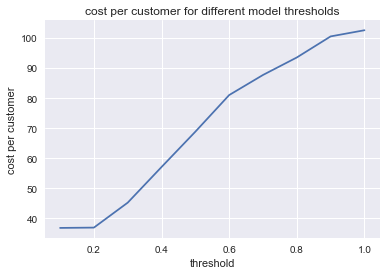

In [48]:
# plot hypothetical cost for different thresholds

import matplotlib.pyplot as plt

plt.plot(thresh,cost)
plt.title('cost per customer for different model thresholds')
plt.xlabel('threshold')
plt.ylabel('cost per customer')
plt.show()

Let's further assume that the model that is currently in use in the telco company applies a threshold of 0.5. The cost per customer associated with this model is about 81 dollars.

In [49]:
# assume that model with threshold=0.5 is currently used, calculate associated cost

cost_current_model = cost[5]
cost_current_model

81.02111158983197

Then, let's calculate the hypothetical savings per customer our optimal model could achieve as the difference between the cost per customer associated with the currently used model and the model with the optimal threshold. The savings per customer are about 44 dollars.

In [50]:
# calculate hypothetical savings per customer as the difference between the currently used model and the optimal model

savings_per_customer = cost_current_model - min(cost)
savings_per_customer

44.16199913830246

To calculate the total hypothetical cost savings we assume that we have a customer base of 350000 customers. The total hypothetical cost savings are then equal to about 15 mn dollars.

In [51]:
# assume a customer base of 350000, multiply by savings per customer to get total savings
total_savings = 350000*savings_per_customer
total_savings

15456699.698405862

### **<a id='7'>7. Summary</a>**

In this kernel we cleaned and explored data form the telecommunication industry, built a churn prediction model and showed the hypothetical business impact it could have by estimating the hypothetical cost savings that such a model could achieve.


The hypothetical cost savings may seem extraordinally high, the assumptions overly simplistic, and there are many elements of this work that could be improved (e.g. the model itself, feature enginering, feature selection etc.), but this kernel was simply meant to show what could be possibly done with quite simply measures and methods to actually have an impact on business through Data Science and Machine Learning. 


Any feedback is highly appreciated and warmly welcome. Thank you!